```sh
pip3 install spacy
python3 -m spacy download en_core_web_sm
```

In [1]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
from os import walk
from os.path import splitext
from collections import defaultdict, Counter

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from data_processor import DataProcessor
data_processor = DataProcessor()

In [9]:
import validators
named_entity_count = Counter()
for (root, dirs, files) in walk('./descriptions/alphago_news_us'):
    for file in files:
        if not file.endswith('.txt'):
            continue
        with open('./descriptions/alphago_news_us/' + file) as f:
            doc = nlp(f.read())
        for ent in doc.ents:
            entity = str(ent)
            if validators.url(entity):
                continue
            named_entity_count[entity] += 1

In [10]:
named_entity_df, log_named_entity_df = data_processor.process(named_entity_count)

In [11]:
named_entity_df.head()

,word,count,index
0,AlphaGo,276,1
1,,231,2
2,AI,208,3
3,Google,149,4
4,first,122,5


In [12]:
log_named_entity_df.head()

,word,count,index
0,AlphaGo,5.620401,0.000000
1,,5.442418,0.693147
2,AI,5.337538,1.098612
3,Google,5.003946,1.386294
4,first,4.804021,1.609438


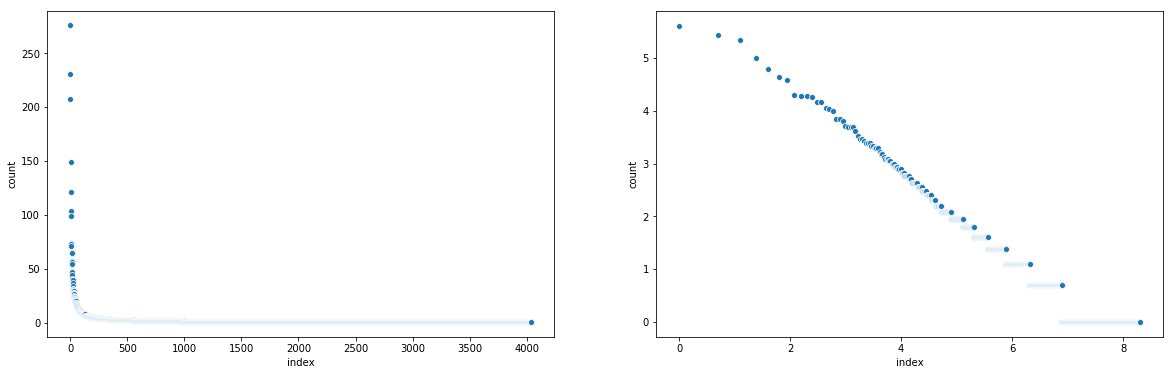

In [13]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=2, nrows=1)
sns.scatterplot(x=named_entity_df['index'], y=named_entity_df['count'], ax=axs[0])
sns.scatterplot(x=log_named_entity_df['index'], y=log_named_entity_df['count'], ax=axs[1])

In [14]:
filtered_named_entity_df = named_entity_df[log_named_entity_df['index'] > 2][log_named_entity_df['index'] < 4]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
with open('./wordcounts/named_entity.count', 'w+') as f:
    for idx, row in filtered_named_entity_df.iterrows():
        f.write('%d %s\n' % (row['count'], row['word']))